In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import estimate_bandwidth, MeanShift
%matplotlib inline

In [4]:
df = pd.read_csv('./data/new_final_data.csv', encoding='cp949')
df.head()

,Unnamed: 0,동,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,보건업_사회복지_서비스업_사업체수,보건업_사업체수,병원_사업체수,...,하천,20대이하,20대,30대,40대,50대,60대,자전거도로갯수,관광지개수,버스정류장 개수
0,2,동서학동,447,81,80,2,15,21,2,0,...,0,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,6,0.0,12
1,3,서서학동,512,92,67,0,12,25,10,2,...,0,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,2,1.0,8
2,4,중화산1동,926,172,262,6,42,51,28,7,...,1,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,3,0.0,11
3,5,중화산2동,"2,629",353,499,2,222,78,38,3,...,1,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,6,0.0,13
4,6,평화1동,658,112,103,3,15,40,16,4,...,0,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,5,0.0,6


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['동', '전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '학교수', '학원수',
       '보건업_사회복지_서비스업_사업체수', '보건업_사업체수', '병원_사업체수', '소매업_자동차_제외_종사자수',
       '숙박_음식점업_종사자수', '보건업_사회복지_서비스업_종사자수', '보건업_종사자수', '병원_종사자수', '총인구_합계',
       '한국인_세대수', '하천', '20대이하', '20대', '30대', '40대', '50대', '60대', '자전거도로갯수',
       '관광지개수', '버스정류장 개수'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   동                   35 non-null     object 
 1   전체산업                35 non-null     object 
 2   소매업_자동차_제외_사업체수     35 non-null     object 
 3   숙박_음식점업_사업체수        35 non-null     int64  
 4   학교수                 35 non-null     int64  
 5   학원수                 35 non-null     int64  
 6   보건업_사회복지_서비스업_사업체수  35 non-null     int64  
 7   보건업_사업체수            35 non-null     int64  
 8   병원_사업체수             35 non-null     int64  
 9   소매업_자동차_제외_종사자수     35 non-null     object 
 10  숙박_음식점업_종사자수        35 non-null     object 
 11  보건업_사회복지_서비스업_종사자수  35 non-null     object 
 12  보건업_종사자수            35 non-null     object 
 13  병원_종사자수             35 non-null     object 
 14  총인구_합계              35 non-null     int64  
 15  한국인_세대수             35 non-null     int64  
 16  하천        

#### numeric화

In [7]:
df_col = ['전체산업','소매업_자동차_제외_사업체수','소매업_자동차_제외_종사자수','숙박_음식점업_종사자수','보건업_사회복지_서비스업_종사자수','보건업_종사자수','병원_종사자수']

for col in df_col:
    for i in range(len(df)):
        df[col][i]= df[col][i].strip().replace(",","")
        

<ipython-input-7-f3727f1917f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]= df[col][i].strip().replace(",","")


In [8]:
df1 = df.iloc[:,1:].apply(pd.to_numeric)

In [9]:
df.iloc[:,1:]

,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,보건업_사회복지_서비스업_사업체수,보건업_사업체수,병원_사업체수,소매업_자동차_제외_종사자수,숙박_음식점업_종사자수,...,하천,20대이하,20대,30대,40대,50대,60대,자전거도로갯수,관광지개수,버스정류장 개수
0,447,81,80,2,15,21,2,0,163,210,...,0,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,6,0.0,12
1,512,92,67,0,12,25,10,2,147,114,...,0,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,2,1.0,8
2,926,172,262,6,42,51,28,7,518,921,...,1,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,3,0.0,11
3,2629,353,499,2,222,78,38,3,834,1545,...,1,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,6,0.0,13
4,658,112,103,3,15,40,16,4,266,256,...,0,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,5,0.0,6
5,2404,411,387,2,211,162,60,4,1160,1192,...,1,21018.433330,20923.298330,30533.113330,43817.755000,40550.925000,48320.566670,5,0.0,23
6,3287,842,585,3,263,162,98,2,2653,1720,...,1,13822.496670,23613.738330,30008.220000,42011.338330,38277.865000,35784.343330,6,0.0,36
7,998,121,92,0,29,38,18,2,224,184,...,1,3264.638333,3902.166667,5044.966667,7041.133333,6804.763333,8173.196667,2,0.0,8
8,1045,273,212,1,47,32,18,1,554,506,...,1,5304.563333,5724.433333,7027.961667,10368.700000,9878.655000,11976.565000,5,0.0,14
9,1227,173,231,5,105,76,17,5,618,739,...,0,14266.081670,13183.676670,21911.456670,32869.018330,33304.173330,31027.470000,5,0.0,19


#### 결측값 확인

In [10]:
df.isna().sum()

동                     0
전체산업                  0
소매업_자동차_제외_사업체수       0
숙박_음식점업_사업체수          0
학교수                   0
학원수                   0
보건업_사회복지_서비스업_사업체수    0
보건업_사업체수              0
병원_사업체수               0
소매업_자동차_제외_종사자수       0
숙박_음식점업_종사자수          0
보건업_사회복지_서비스업_종사자수    0
보건업_종사자수              0
병원_종사자수               0
총인구_합계                0
한국인_세대수               0
하천                    0
20대이하                 0
20대                   0
30대                   0
40대                   0
50대                   0
60대                   0
자전거도로갯수               0
관광지개수                 1
버스정류장 개수              0
dtype: int64

In [12]:
df = df.fillna(0)

## 차원 축소

In [13]:
# 스케일링
df_scaled = StandardScaler().fit_transform(df.iloc[:,1:])

In [14]:
# PCA 변환
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_trans = pca.transform(df_scaled)
print(pca_trans.shape)

(35, 2)


In [15]:
print(pca.explained_variance_ratio_)

[0.51192765 0.12299197]


**=> PCA 요소 두개로 기존 데이터를 63%정도 설명할 수 있음**

In [16]:
# SVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(df_scaled)
tsvd_trans = tsvd.transform(df_scaled)
print(tsvd_trans.shape)

(35, 2)


In [17]:
print(tsvd.explained_variance_ratio_)

[0.51192765 0.12299197]


**=> 같은 결과**

In [18]:
# 데이터프레임으로 변환

pca_columns = ['pca_1','pca_2']
df_pca = pd.DataFrame(pca_trans, columns=pca_columns)
df_pca.head()

,pca_1,pca_2
0,-4.093368,-1.399120
1,-4.653440,-0.502885
2,-0.222820,5.980730
3,1.964922,-0.486715
4,-3.385938,0.472414


In [19]:
# '동' 칼럼과 붙이기
data = pd.concat([df['동'],df_pca], axis=1)
data.shape

(35, 3)

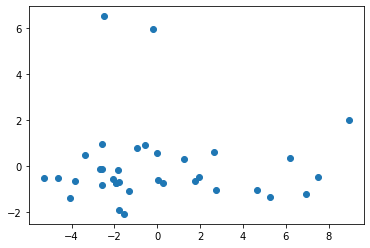

In [20]:
plt.scatter(data['pca_1'], data['pca_2'])

## 군집화

#### '동' 칼럼을 인덱스로 변경

In [21]:
jj_df = data.set_index("동")
jj_df.head()

,pca_1,pca_2
동,,
동서학동,-4.093368,-1.399120
서서학동,-4.653440,-0.502885
중화산1동,-0.222820,5.980730
중화산2동,1.964922,-0.486715
평화1동,-3.385938,0.472414


#### Mean Shift

In [22]:
# 최적의 bandwidth 찾기
bandwidth = estimate_bandwidth(jj_df)
bandwidth

2.796806421959846

In [24]:
meanshift = MeanShift(bandwidth=2.8)
cluster_labels = meanshift.fit_predict(jj_df)
np.unique(cluster_labels)

array([0, 1, 2, 3])

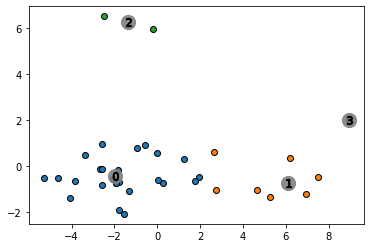

In [25]:
jj_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()